## Linear regression based Algorithm

The most basic machine learning algorithm that can be implemented on the data is linear regression. 
The linear regression model returns an equation that determines the relationship between the independent variables and the dependent variable.

The equation for linear regression can be written as:  
                **Y = W1X1 + W2X2 + .....+ WnXn**

Here, X1, X2,….Xn represent the independent variables while the coefficients W1, W2, …. Wn  represent the weights. 

We are using the date column to extract features like – day, month, year,  mon/fri etc. and then fit a linear regression model.


In [14]:
# import packages
import pandas as pd
import numpy as np

# to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

# setting figure size
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 20, 10

# for normalizing data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

# read the file
df = pd.read_csv('NSE-TATAGLOBAL.csv')

# print the head
df.head()


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-12-17,212.80,213.40,209.50,210.00,210.05,1303397.0,2740.81
1,2018-12-14,212.00,213.35,210.00,213.30,212.35,860565.0,1822.86
2,2018-12-13,213.35,215.70,210.25,212.90,212.40,1196911.0,2552.82
3,2018-12-12,203.15,213.90,203.00,212.65,212.95,1755046.0,3695.14
4,2018-12-11,195.00,203.80,195.00,202.85,202.85,1818568.0,3635.49


In [15]:
# setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']


In [16]:
# sorting
data = df.sort_index(ascending=True, axis=0)

In [17]:
# creating a separate dataset
new_data = pd.DataFrame(index=range(0, len(df)), columns=['Date', 'Close'])

for i in range(0, len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]


In [18]:
total = len(new_data)
cut_length = 1687
remain = total - cut_length
total, cut_length, remain


(2087, 1687, 400)

In [19]:
# attr = ['Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
#             'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start']

year, month, week, day, day_of_week, day_of_year = [], [], [], [], [], []
Is_month_end, Is_month_start, Is_quarter_end, Is_quarter_start, Is_year_end, Is_year_start = [], [], [], [], [], []
date = new_data['Date'].values
for ts in date:
    dt_year, dt_week, dt_weekday = ts.isocalendar()
    year.append(dt_year)
    month.append(ts.month)
    week.append(dt_week)
    day.append(ts.day)
    day_of_week.append(dt_weekday)
    day_of_year.append(ts.timetuple().tm_yday)
    Is_month_end.append(ts.is_month_end)
    Is_month_start.append(ts.is_month_start)
    Is_quarter_end.append(ts.is_quarter_end)
    Is_quarter_start.append(ts.is_quarter_start)
    Is_year_end.append(ts.is_year_end)
    Is_year_start.append(ts.is_year_start)

print(len(year), len(month), len(week), len(day), len(day_of_week), len(day_of_year), len(Is_month_end),
      len(Is_month_start), len(Is_quarter_end), len(Is_quarter_start), len(Is_year_start), len(Is_year_end))


2087 2087 2087 2087 2087 2087 2087 2087 2087 2087 2087 2087


In [20]:
new_data['Year'] = year
new_data['Month'] = month
new_data['Week'] = week
new_data['Day'] = day
new_data['Dayofweek'] = day_of_week
new_data['Dayofyear'] = day_of_year
new_data['Is_month_end'] = Is_month_end
new_data['Is_month_start'] = Is_month_start
new_data['Is_quarter_end'] = Is_quarter_end
new_data['Is_quarter_start'] = Is_quarter_start
new_data['Is_year_end'] = Is_year_end
new_data['Is_year_start'] = Is_year_start

new_data.drop('Date', axis=1, inplace=True)  # elapsed will be the time stamp


In [21]:
# split into train and validation
train = new_data[:cut_length]
valid = new_data[cut_length:]

new_data.shape, train.shape, valid.shape


((2087, 13), (1687, 13), (400, 13))

In [22]:
x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']


In [23]:
# y_train


In [24]:
# implement linear regression
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
# make predictions and find the rmse
preds = model.predict(x_valid)
rms = np.sqrt(np.mean(np.power((np.array(y_valid) - np.array(preds)), 2)))
rms


91.31333519375146

C:\ProgramData\Miniconda3\envs\ML\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Miniconda3\envs\ML\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


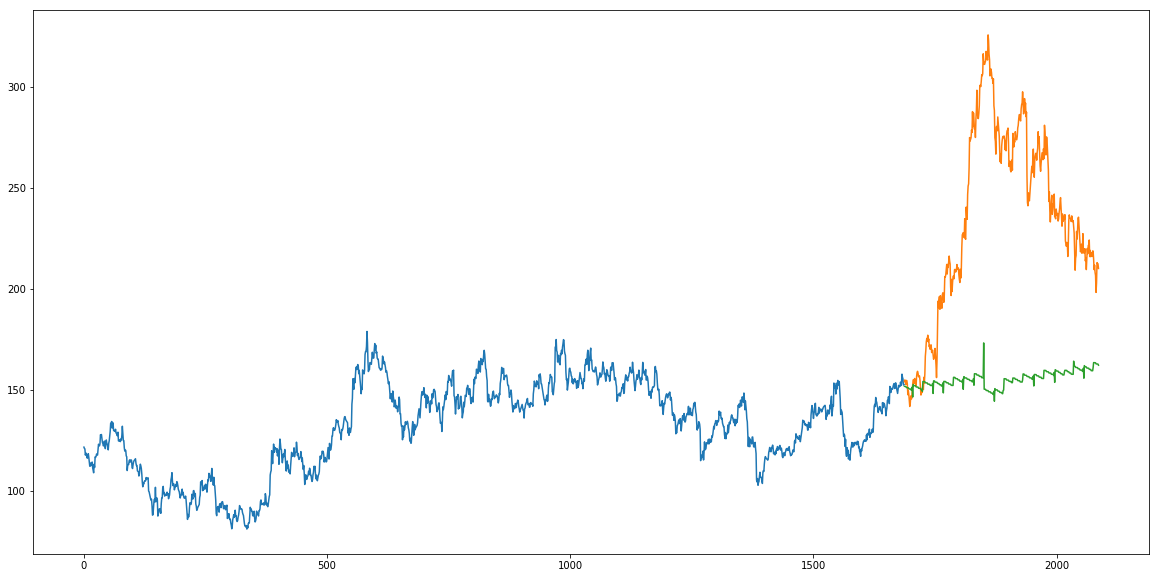

In [26]:
# plot
valid['Predictions'] = 0
valid['Predictions'] = preds

valid.index = new_data[cut_length:].index
train.index = new_data[:cut_length].index

plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
